In [ ]:
import pandas as pd


df = pd.read_csv('/content/Karachi_Healthcare_Hospitals.csv')


df.head()


,Hospital Name,City,Province,Hospital Type,Number of Beds,Emergency Services,Contact Number
0,Aga Khan University Hospital,Karachi,Sindh,Private,560,Yes,021-34930051
1,Liaquat National Hospital,Karachi,Sindh,Private,700,Yes,021-34412412
2,Indus Hospital,Karachi,Sindh,Charity,300,Yes,021-35112709
3,Civil Hospital Karachi,Karachi,Sindh,Public,1200,Yes,021-99215740


In [ ]:

df.isnull().sum()


df = df.dropna()


df_encoded = pd.get_dummies(df, drop_first=True)


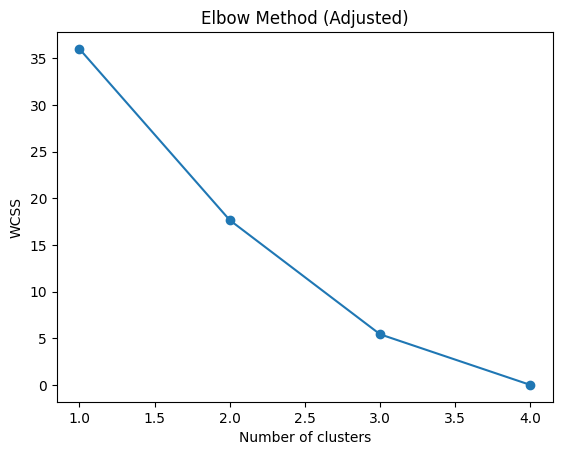

In [ ]:
# Only loop from 1 to number of samples (or slightly less)
n_samples = scaled_data.shape[0]
max_k = min(10, n_samples)

wcss = []
for i in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot WCSS
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method (Adjusted)')
plt.show()


In [ ]:
df = df.dropna()


In [ ]:
df = df.dropna(thresh=int(df.shape[1] * 0.7))  # Keep rows with at least 70% non-NA values


In [ ]:
df = df.fillna(method='ffill')  # Forward fill missing values


<ipython-input-15-6e0a47601f52>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill missing values


In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters (adjust based on your Elbow method)
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit to the scaled data and predict
clusters = kmeans.fit_predict(scaled_data)

# Add to the original dataframe
df['Cluster'] = clusters


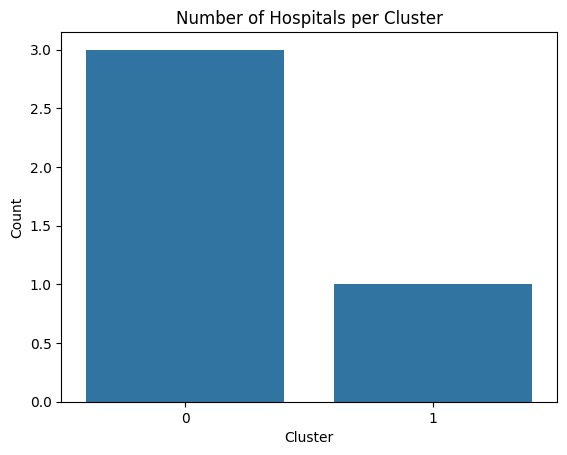

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=df)
plt.title('Number of Hospitals per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


<ipython-input-22-9440f6d0fc27>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


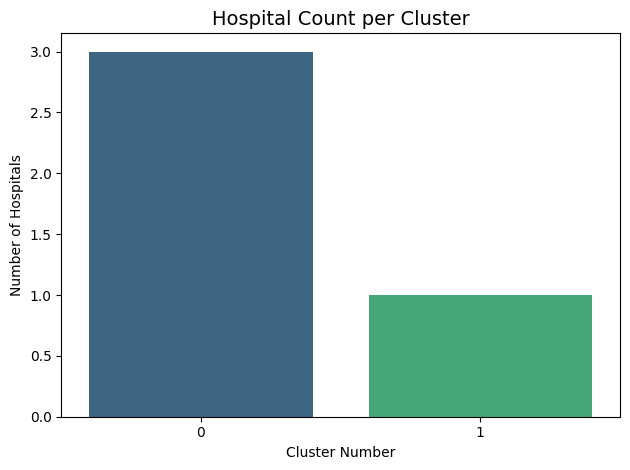

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Hospital Count per Cluster', fontsize=14)
plt.xlabel('Cluster Number')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


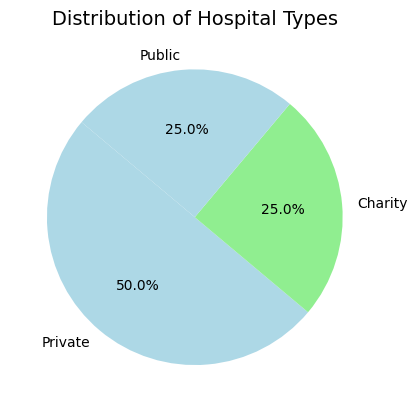

In [ ]:
df['Hospital Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=140)
plt.title('Distribution of Hospital Types', fontsize=14)
plt.ylabel('')
plt.show()


In [ ]:
print(df.columns.tolist())


['Hospital Name', 'City', 'Province', 'Hospital Type', 'Number of Beds', 'Emergency Services', 'Contact Number', 'Cluster']


In [ ]:
# Group by Province, get the average number of beds
avg_beds = df.groupby('Province')['Number of Beds'].mean()
print(avg_beds)

# Group by Province, get the first Hospital Name in each group
first_hospital = df.groupby('Province')['Hospital Name'].first()
print(first_hospital)


Province
Sindh    690.0
Name: Number of Beds, dtype: float64
Province
Sindh    Aga Khan University Hospital
Name: Hospital Name, dtype: object


In [ ]:
hospital_count = df.groupby('Province')['Hospital Name'].count()
print(hospital_count)


Province
Sindh    4
Name: Hospital Name, dtype: int64


In [ ]:
total_beds_city = df.groupby('City')['Number of Beds'].sum()
print(total_beds_city)


City
Karachi    2760
Name: Number of Beds, dtype: int64


In [ ]:
emergency_counts = df.groupby('Emergency Services')['Hospital Name'].count()
print(emergency_counts)


Emergency Services
Yes    4
Name: Hospital Name, dtype: int64


In [ ]:
hospital_type_counts = df['Hospital Type'].value_counts()
print(hospital_type_counts)


Hospital Type
Private    2
Charity    1
Public     1
Name: count, dtype: int64


In [ ]:
agg_df = df.groupby('Province').agg(
    total_beds=('Number of Beds', 'sum'),
    hospital_count=('Hospital Name', 'count'),
    emergency_yes_count=('Emergency Services', lambda x: (x == 'Yes').sum())
)
print(agg_df)


          total_beds  hospital_count  emergency_yes_count
Province                                                 
Sindh           2760               4                    4


In [ ]:
# Step 0: Preview data (optional)
print("=== Data preview ===")
print(df.head())

# Step 1: Mean Number of Beds by Province
mean_beds = df.groupby('Province')['Number of Beds'].mean()
print("\nMean Number of Beds by Province:\n", mean_beds)

# Step 2: First Hospital Name in each Province
first_hospital = df.groupby('Province')['Hospital Name'].first()
print("\nFirst Hospital in each Province:\n", first_hospital)

# Step 3: Number of Hospitals by Province
hospital_counts = df.groupby('Province')['Hospital Name'].count()
print("\nNumber of Hospitals by Province:\n", hospital_counts)

# Step 4: Total Beds by City
total_beds_city = df.groupby('City')['Number of Beds'].sum()
print("\nTotal Beds by City:\n", total_beds_city)

# Step 5: Hospitals by Emergency Services availability
emergency_services_count = df.groupby('Emergency Services')['Hospital Name'].count()
print("\nHospitals by Emergency Services availability:\n", emergency_services_count)

# Step 6: Count of Hospitals by Hospital Type
hospital_type_counts = df['Hospital Type'].value_counts()
print("\nCount of Hospitals by Type:\n", hospital_type_counts)

# Step 7: Combined Aggregation per Province
combined_agg = df.groupby('Province').agg(
    total_beds=('Number of Beds', 'sum'),
    hospital_count=('Hospital Name', 'count'),
    emergency_yes_count=('Emergency Services', lambda x: (x == 'Yes').sum())
)
print("\nCombined Aggregation per Province:\n", combined_agg)


=== Data preview ===
                  Hospital Name     City Province Hospital Type  \
0  Aga Khan University Hospital  Karachi    Sindh       Private   
1     Liaquat National Hospital  Karachi    Sindh       Private   
2                Indus Hospital  Karachi    Sindh       Charity   
3        Civil Hospital Karachi  Karachi    Sindh        Public   

   Number of Beds Emergency Services Contact Number  Cluster  
0             560                Yes   021-34930051        0  
1             700                Yes   021-34412412        0  
2             300                Yes   021-35112709        0  
3            1200                Yes   021-99215740        1  

Mean Number of Beds by Province:
 Province
Sindh    690.0
Name: Number of Beds, dtype: float64

First Hospital in each Province:
 Province
Sindh    Aga Khan University Hospital
Name: Hospital Name, dtype: object

Number of Hospitals by Province:
 Province
Sindh    4
Name: Hospital Name, dtype: int64

Total Beds by City:
 City

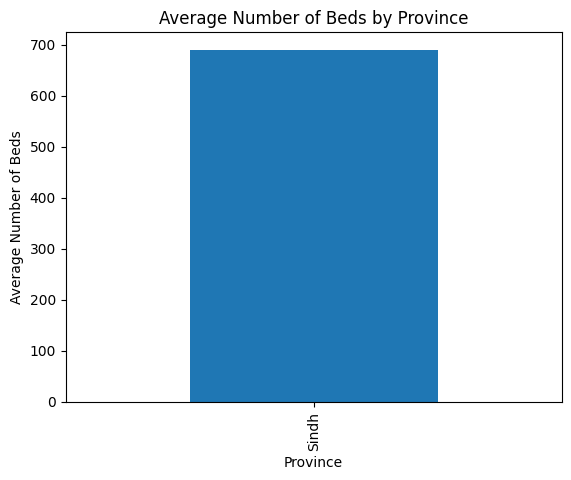

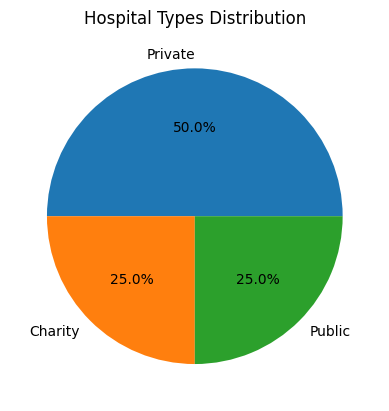

In [ ]:
import matplotlib.pyplot as plt

# Bar chart of average beds by Province
mean_beds.plot(kind='bar', title='Average Number of Beds by Province')
plt.ylabel('Average Number of Beds')
plt.show()

# Pie chart of hospital types
hospital_type_counts.plot(kind='pie', autopct='%1.1f%%', title='Hospital Types Distribution')
plt.ylabel('')
plt.show()


In [ ]:
karachi_emergency = df[(df['City'] == 'Karachi') & (df['Emergency Services'] == 'Yes')]
print(karachi_emergency)


                  Hospital Name     City Province Hospital Type  \
0  Aga Khan University Hospital  Karachi    Sindh       Private   
1     Liaquat National Hospital  Karachi    Sindh       Private   
2                Indus Hospital  Karachi    Sindh       Charity   
3        Civil Hospital Karachi  Karachi    Sindh        Public   

   Number of Beds Emergency Services Contact Number  Cluster  
0             560                Yes   021-34930051        0  
1             700                Yes   021-34412412        0  
2             300                Yes   021-35112709        0  
3            1200                Yes   021-99215740        1  


In [ ]:
sorted_hospitals = df.sort_values(by='Number of Beds', ascending=False)
print(sorted_hospitals[['Hospital Name', 'Number of Beds']])


                  Hospital Name  Number of Beds
3        Civil Hospital Karachi            1200
1     Liaquat National Hospital             700
0  Aga Khan University Hospital             560
2                Indus Hospital             300


In [ ]:
combined_agg.to_csv('province_hospital_summary.csv')
karachi_emergency.to_csv('karachi_emergency_hospitals.csv')


In [ ]:
# Save the files
combined_agg.to_csv('province_hospital_summary.csv')
karachi_emergency.to_csv('karachi_emergency_hospitals.csv')

# Read back and print first 5 rows to confirm
print("Preview of province_hospital_summary.csv:")
print(pd.read_csv('province_hospital_summary.csv').head())

print("\nPreview of karachi_emergency_hospitals.csv:")
print(pd.read_csv('karachi_emergency_hospitals.csv').head())


Preview of province_hospital_summary.csv:
  Province  total_beds  hospital_count  emergency_yes_count
0    Sindh        2760               4                    4

Preview of karachi_emergency_hospitals.csv:
   Unnamed: 0                 Hospital Name     City Province Hospital Type  \
0           0  Aga Khan University Hospital  Karachi    Sindh       Private   
1           1     Liaquat National Hospital  Karachi    Sindh       Private   
2           2                Indus Hospital  Karachi    Sindh       Charity   
3           3        Civil Hospital Karachi  Karachi    Sindh        Public   

   Number of Beds Emergency Services Contact Number  Cluster  
0             560                Yes   021-34930051        0  
1             700                Yes   021-34412412        0  
2             300                Yes   021-35112709        0  
3            1200                Yes   021-99215740        1  


Percentage of Hospitals with Emergency Services by Province:
 Province
Sindh    100.0
Name: Emergency Services, dtype: float64

Average Number of Beds by Hospital Type:
 Hospital Type
Charity     300.0
Private     630.0
Public     1200.0
Name: Number of Beds, dtype: float64

Correlation Matrix (only numeric columns):
                Number of Beds   Cluster
Number of Beds        1.000000  0.898896
Cluster               0.898896  1.000000


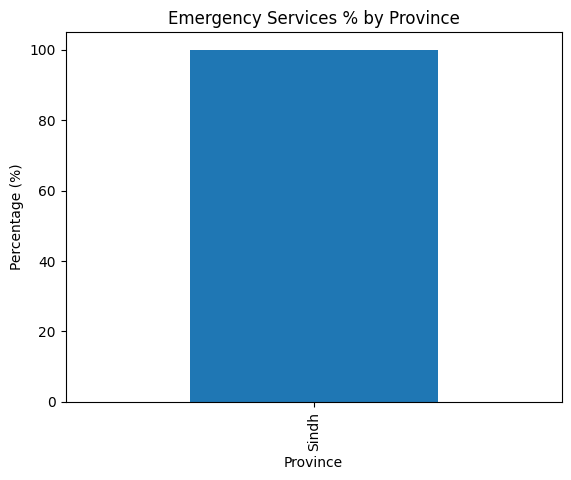


Top 5 Hospitals by Number of Beds:
                  Hospital Name  Number of Beds Province
3        Civil Hospital Karachi            1200    Sindh
1     Liaquat National Hospital             700    Sindh
0  Aga Khan University Hospital             560    Sindh
2                Indus Hospital             300    Sindh


In [ ]:
# Step 1: Percentage of Hospitals with Emergency Services per Province
emergency_pct = df.groupby('Province')['Emergency Services'].apply(lambda x: (x == 'Yes').mean() * 100)
print("Percentage of Hospitals with Emergency Services by Province:\n", emergency_pct)

# Step 2: Average Number of Beds by Hospital Type
avg_beds_by_type = df.groupby('Hospital Type')['Number of Beds'].mean()
print("\nAverage Number of Beds by Hospital Type:\n", avg_beds_by_type)

# Step 3: Correlation Matrix on numeric columns only
print("\nCorrelation Matrix (only numeric columns):")
print(df.select_dtypes(include='number').corr())

# Step 4: Visualization of Emergency Services Percentage by Province
import matplotlib.pyplot as plt

emergency_pct.plot(kind='bar', title='Emergency Services % by Province')
plt.ylabel('Percentage (%)')
plt.show()

# Step 5: Top 5 Hospitals by Number of Beds
top_hospitals = df.sort_values(by='Number of Beds', ascending=False).head(5)
print("\nTop 5 Hospitals by Number of Beds:")
print(top_hospitals[['Hospital Name', 'Number of Beds', 'Province']])


Hospitals with Emergency Services and fewer than 500 beds:
     Hospital Name  Number of Beds Province
2  Indus Hospital             300    Sindh

Number of Hospitals by Province and Type:
 Hospital Type  Charity  Private  Public
Province                               
Sindh                1        2       1

Data with Bed Category column:
                   Hospital Name  Number of Beds Bed Category
0  Aga Khan University Hospital             560       Medium
1     Liaquat National Hospital             700        Large
2                Indus Hospital             300       Medium
3        Civil Hospital Karachi            1200        Large

Average Number of Beds by Bed Category:
 Bed Category
Large     950.0
Medium    430.0
Name: Number of Beds, dtype: float64


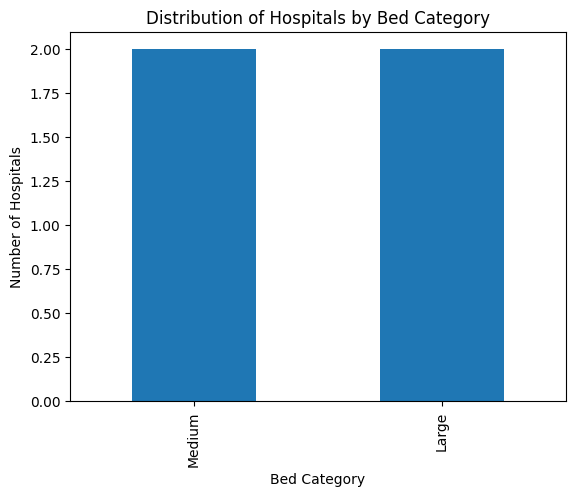

In [ ]:
# Step 6: Hospitals with Emergency Services and fewer than 500 beds
small_emergency_hospitals = df[(df['Emergency Services'] == 'Yes') & (df['Number of Beds'] < 500)]
print("Hospitals with Emergency Services and fewer than 500 beds:\n",
      small_emergency_hospitals[['Hospital Name', 'Number of Beds', 'Province']])

# Step 7: Count of Hospitals by Province and Hospital Type (Cross Tabulation)
hospital_crosstab = pd.crosstab(df['Province'], df['Hospital Type'])
print("\nNumber of Hospitals by Province and Type:\n", hospital_crosstab)

# Step 8: Add Bed Category column
def bed_category(beds):
    if beds < 300:
        return 'Small'
    elif beds < 700:
        return 'Medium'
    else:
        return 'Large'

df['Bed Category'] = df['Number of Beds'].apply(bed_category)
print("\nData with Bed Category column:\n", df[['Hospital Name', 'Number of Beds', 'Bed Category']].head())

# Step 9: Average Number of Beds by Bed Category
avg_beds_by_category = df.groupby('Bed Category')['Number of Beds'].mean()
print("\nAverage Number of Beds by Bed Category:\n", avg_beds_by_category)

# Step 10: Visualize Bed Category distribution
import matplotlib.pyplot as plt
df['Bed Category'].value_counts().plot(kind='bar', title='Distribution of Hospitals by Bed Category')
plt.ylabel('Number of Hospitals')
plt.show()


Percentage of Hospital Types per Province:
 Hospital Type  Charity  Private  Public
Province                               
Sindh             25.0     50.0    25.0
Data with Bed Category saved as 'hospital_data_with_bed_category.csv'

Karachi Public Hospitals with more than 600 beds:
             Hospital Name  Number of Beds
3  Civil Hospital Karachi            1200


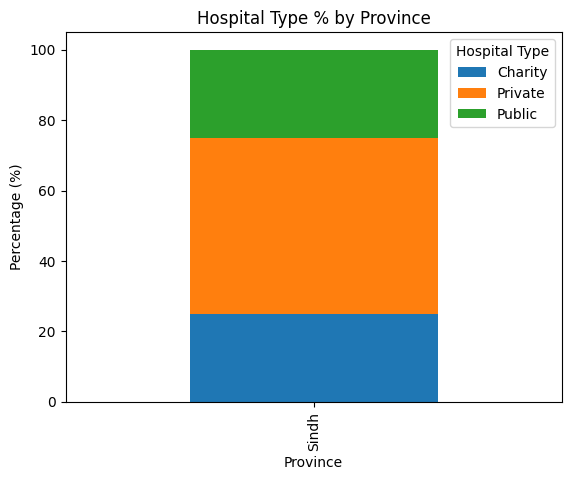

In [ ]:
# Step 11: Percentage of each Hospital Type in each Province
hospital_type_pct = pd.crosstab(df['Province'], df['Hospital Type'], normalize='index') * 100
print("Percentage of Hospital Types per Province:\n", hospital_type_pct)

# Step 12: Save data with Bed Category to CSV
df.to_csv('hospital_data_with_bed_category.csv', index=False)
print("Data with Bed Category saved as 'hospital_data_with_bed_category.csv'")

# Step 13: Karachi Public Hospitals with more than 600 beds
karachi_public_large = df[(df['City'] == 'Karachi') & (df['Hospital Type'] == 'Public') & (df['Number of Beds'] > 600)]
print("\nKarachi Public Hospitals with more than 600 beds:\n", karachi_public_large[['Hospital Name', 'Number of Beds']])

# Step 14: Visualize hospital type distribution per Province (stacked bar)
import matplotlib.pyplot as plt
hospital_type_pct.plot(kind='bar', stacked=True, title='Hospital Type % by Province')
plt.ylabel('Percentage (%)')
plt.show()


In [ ]:
# Step 15: Check and clean Contact Number formats
print("Unique Contact Number formats:")
print(df['Contact Number'].unique())

df['Clean Contact'] = df['Contact Number'].str.replace(r'[^0-9]', '', regex=True)
print("\nContact Number cleaning sample:")
print(df[['Contact Number', 'Clean Contact']].head())

# Step 16: Add Hospital Size Label column based on Number of Beds
def hospital_size(row):
    if row['Number of Beds'] > 1000:
        return 'Very Large'
    elif row['Number of Beds'] > 500:
        return 'Large'
    else:
        return 'Small'

df['Hospital Size Label'] = df.apply(hospital_size, axis=1)
print("\nSample Hospital Size Labels:")
print(df[['Hospital Name', 'Number of Beds', 'Hospital Size Label']].head())

# Step 17: Summary statistics per Province
province_summary = df.groupby('Province').agg({
    'Number of Beds': ['mean', 'min', 'max', 'sum'],
    'Hospital Name': 'count'
})
print("\nProvince Summary Statistics:")
print(province_summary)

# Step 18: Save Province summary to CSV
province_summary.to_csv('province_summary_stats.csv')
print("\nProvince summary statistics saved to 'province_summary_stats.csv'")


Unique Contact Number formats:
['021-34930051' '021-34412412' '021-35112709' '021-99215740']

Contact Number cleaning sample:
  Contact Number Clean Contact
0   021-34930051   02134930051
1   021-34412412   02134412412
2   021-35112709   02135112709
3   021-99215740   02199215740

Sample Hospital Size Labels:
                  Hospital Name  Number of Beds Hospital Size Label
0  Aga Khan University Hospital             560               Large
1     Liaquat National Hospital             700               Large
2                Indus Hospital             300               Small
3        Civil Hospital Karachi            1200          Very Large

Province Summary Statistics:
         Number of Beds                  Hospital Name
                   mean  min   max   sum         count
Province                                              
Sindh             690.0  300  1200  2760             4

Province summary statistics saved to 'province_summary_stats.csv'


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Encode Emergency Services: Yes=1, No=0
df['Emergency Binary'] = df['Emergency Services'].map({'Yes':1, 'No':0})

X = df[['Number of Beds']]
y = df['Emergency Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare data: convert Emergency Services to numeric
df['Emergency_Num'] = df['Emergency Services'].map({'Yes': 1, 'No': 0})

# Features: Number of Beds and Emergency Numeric
X = df[['Number of Beds', 'Emergency_Num']]

# KMeans clustering (let's choose 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print(df[['Hospital Name', 'Number of Beds', 'Emergency Services', 'Cluster']].head())


                  Hospital Name  Number of Beds Emergency Services  Cluster
0  Aga Khan University Hospital             560                Yes        0
1     Liaquat National Hospital             700                Yes        0
2                Indus Hospital             300                Yes        2
3        Civil Hospital Karachi            1200                Yes        1


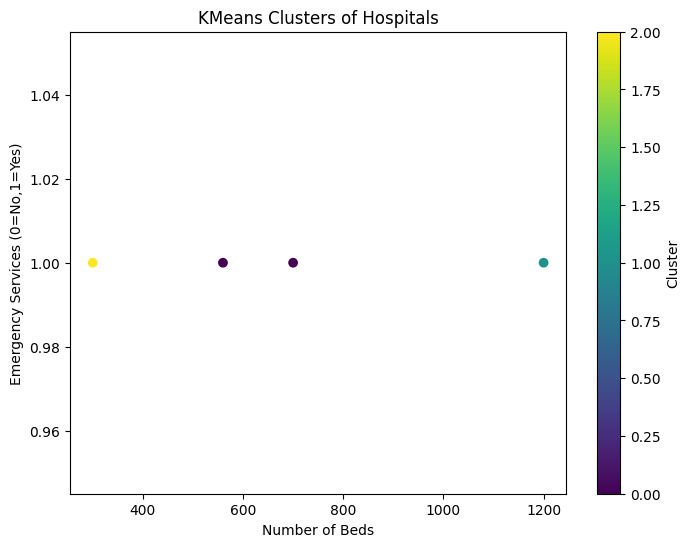

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Number of Beds'], df['Emergency_Num'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Number of Beds')
plt.ylabel('Emergency Services (0=No,1=Yes)')
plt.title('KMeans Clusters of Hospitals')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df[['Number of Beds']]
y = df['Emergency_Num']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
df.to_csv('hospital_data_with_clusters.csv', index=False)
print("Clustered hospital data saved to 'hospital_data_with_clusters.csv'")


Clustered hospital data saved to 'hospital_data_with_clusters.csv'


In [ ]:
import folium

# Start a map centered roughly on Karachi
m = folium.Map(location=[24.86, 67.01], zoom_start=6)

# Add markers for each hospital (approximate location by city)
city_coords = {
    'Karachi': [24.86, 67.01],
    # Add other cities with lat-lon if you have
}

for idx, row in df.iterrows():
    city = row['City']
    if city in city_coords:
        folium.Marker(
            location=city_coords[city],
            popup=f"{row['Hospital Name']} ({row['Hospital Type']})",
            icon=folium.Icon(color='blue' if row['Emergency Services']=='Yes' else 'red')
        ).add_to(m)

# Save and display
m.save('hospitals_map.html')
print("Map saved as hospitals_map.html")


Map saved as hospitals_map.html


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd

# Load your data (make sure the CSV path is correct)
df = pd.read_csv('hospital_data_with_clusters.csv')

st.title("Hospital Data Dashboard")

# Sidebar filters
province_filter = st.sidebar.multiselect("Select Province(s):", options=df['Province'].unique(), default=df['Province'].unique())
hospital_type_filter = st.sidebar.multiselect("Select Hospital Type(s):", options=df['Hospital Type'].unique(), default=df['Hospital Type'].unique())

# Filter data
filtered_df = df[(df['Province'].isin(province_filter)) & (df['Hospital Type'].isin(hospital_type_filter))]

st.write(f"### Showing {filtered_df.shape[0]} hospitals")

# Show filtered data
st.dataframe(filtered_df)

# Summary statistics
st.write("### Average Number of Beds:")
st.write(filtered_df['Number of Beds'].mean())

# Bar chart for Hospital Size Label counts
st.write("### Hospital Size Distribution:")
st.bar_chart(filtered_df['Hospital Size Label'].value_counts())


2025-05-17 12:30:42.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 12:30:42.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 12:30:42.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 12:30:42.230 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 12:30:42.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 12:30:42.234 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 12:30:42.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 12:30:42.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

<ipython-input-84-35d793f2c4d5>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Hospital Type', y='Number of Beds', ci=None)


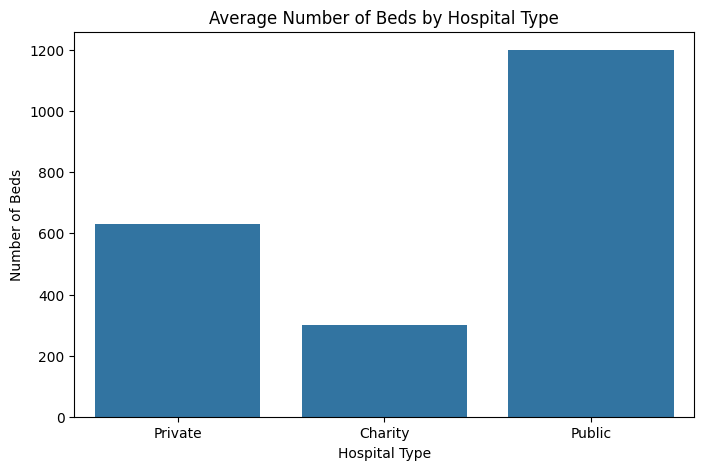

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Hospital Type', y='Number of Beds', ci=None)
plt.title('Average Number of Beds by Hospital Type')
plt.show()
